In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import mglearn

from matplotlib import font_manager
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# font_name = font_manager.FontProperties(fname="NanumBarunGothic.ttf").get_name()
plt.rc('font', family=font_name)
plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

## 0423

## 데이터 표현과 특성 공학
#### 특성 자동선택
- 중요한 변수들만 뽑아서 정확도는 낮더라도 어떤 작업을 수행해야 개선이 되는지 확인해야 하는 경우
- 모델 기반 특성 선택
    - importance를 이용해서 (tree model)
    - Lasso 이용 (회귀)
- 반복적 특성 선택
    - 모든 변수를 다 넣은 후 1개씩 제거하면서 중요도 측정.
    
#### 전문가 지식 활용
- 분석가의 도메인 지식은 전부 높을 수가 없으므로, 데이터를 이용해서 전문가의 자문을 구해서 FE 해보자.
___

#### 
- 모든 모델은 특징이 있으며, 각각의 특성에 맞도록 데이터를 변환해서 사용해야한다.
- 예측 가능하면서 성능을 올릴 수 있는 것이 선형모델
- 쉽고 간편하지만 미분이 불가능하여 딥러닝에 적용하기 어렵고, 성능을 올리기가 어려운 것이 트리모델
- 따라서 트리모델이 쉽고 간편하지만, 주로 선형모델을 많이 사용한다.


### 범주형 변수
- object, category
___
#### 범주형 데이터 다루기
0. 데이터의 유형 확인해볼 것. 
    ```python
    if data.iloc[:, i].dtype.name == 'object', 'category', 'bool':
    ```
1. value_counts()를 이용해서 해당 데이터의 종류을 확인해볼 것.
2. for문을 이용해서 모든 feature의 value_counts() 확인해볼 것.

#### 원-핫-인코딩 (가변수)
- 범주형 변수를 표현하는 방법

In [2]:
import os
# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정하고
# "names" 매개변수로 열 이름을 제공합니다
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# 예제를 위해 몇개의 열만 선택합니다
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display 함수는 주피터 노트북을 위해 포맷팅된 출력을 만듭니다
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


##### 문자열로 된 범주형 데이터 확인하기

In [3]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


___
### dummy 변수 생성
- 생성 후 원래의 col은 사라진다. 따라서 개별적으로 지우거나 더미 변수 col만 선택할 필요 X

In [4]:
print("원본 특성:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ 

In [5]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [6]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# NumPy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


사이킷런 0.22 버전에서 `LogisticRegression` 클래스의 `solver` 매개변수 기본값이 `liblinear`에서 `lbfgs`로 변경될 예정입니다. 사이킷런 0.20 버전에서 `solver` 매개변수를 지정하지 않는 경우 이에 대한 경고 메세지가 출력됩니다. 경고 메세지를 피하기 위해 `solver` 매개변수 값을 `liblinear`로 지정합니다.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수: 0.81


- 범주의 유형이 2개일 경우 np.where를 써도 무방하다.

#### 숫자로 표현된 범주형 특성

In [8]:
# 숫자 특성과 범주형 문자열 특성을 가진 DataFrame을 만듭니다
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1],
                        '범주형 특성': ['양말', '여우', '양말', '상자']})
display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [9]:
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [10]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str) # 숫자이지만 범주형이라면 str로 바꿔주고 일괄적으로 실행
dummy = pd.get_dummies(data)

In [11]:
display(pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성'])) # 바꾸고 싶은 col 넣어줄 것.

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


- dummy 생성 이후 기존의 col은 제거되는 모습.

___
### 구간 분할, 이산화 그리고 선형 모델, 트리 모델

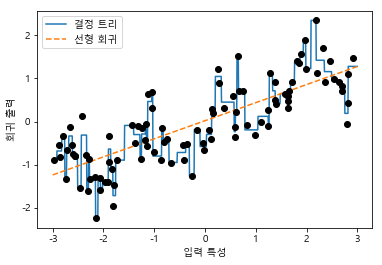

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="결정 트리")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="선형 회귀")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

- y = ax+b+csin(dx)+e 
- 추세선 : ax+b
- noise : e
- 주기 : d
- 위 그래프의 유형을 보고 구간화하면 되겠다라는 생각을 가지면 성공 ^ 6
- 학습 범위를 벗어나는 입력 데이터에 대해서는 예측(predict)을 지양하고, forecasting을 해야한다.
    - forecasting : 과거 데이터를 섞지않고, 시간 순으로 학습한 후 미래를 예측한다.

#### 데이터를 보고 나눌 구간을 정한 만큼 구간 수(10)를 지정한다.
- edge point 수 : 11

In [13]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [14]:
# np.digitize
which_bin = np.digitize(X, bins=bins)
print("\n데이터 포인트:\n", X[:5])
print("\n데이터 포인트의 소속 구간:\n", which_bin[:5])


데이터 포인트:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터 포인트의 소속 구간:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


- cut과 digitize의 차이점 :
    - cut : 0, 1, 2 == [)[)[)
    - digitize : 0, 1, 2, 3, 4 == )[)[)[)[
        - forecasting을 하기 위해서 digitize를 사용한다.

사이킷런 0.22 버전에서 `OneHotEncoder` 클래스가 데이터에서 정수 카테고리를 인식하는 방식이 변경될 예정입니다. 종전에는 훈련 데이터에 나타난 0~최댓값 사이 범위를 카테고리로 인식하여 원-핫 인코딩하지만 0.22 버전부터는 고유한 정수 값을 카테고리로 사용합니다. 후자의 경우 0~최댓값 사이의 정수라도 훈련 데이터에 없는 값을 변환하려면 에러가 발생합니다. 경고 메세지를 피하고 고유한 정수 값을 사용하는 방식을 선택하려면 `categories` 매개변수를 `auto`로 지정합니다.

#### 연속형 데이터를 범주형 데이터로 변환

In [15]:
from sklearn.preprocessing import OneHotEncoder
# 변환을 위해 OneHotEncoder를 사용합니다
encoder = OneHotEncoder(categories='auto', sparse=False)
# encoder.fit은 which_bin에 나타난 유일한 값을 찾습니다
encoder.fit(which_bin)
# 원-핫-인코딩으로 변환합니다
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


#### Feature engineered modeling
- FE된 변수들을 이용해 모델을 생성하자.

Text(0.5, 0, '입력 특성')

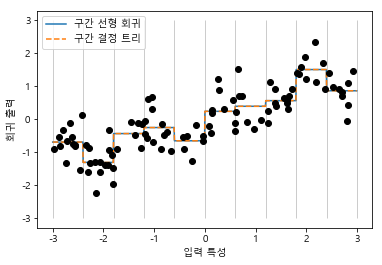

In [17]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y) # 범주형 데이터로 학습.
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀') 

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")

- 선형회귀와 결정트리의 구간이 동일.
- loss가 가장 적은 mean값으로 학습한다.

### 교차항과 고차항

In [18]:
# X값을 사용해서 추세선을 알아보자.
X_combined = np.hstack([X, X_binned]) 
print(X_combined.shape)

(100, 11)


- (100, 1), (100, 10) 합쳐진 모습

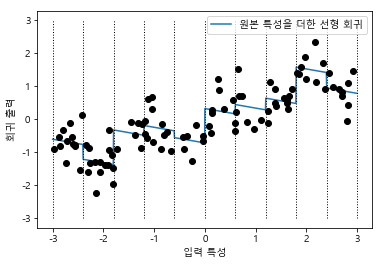

In [19]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1) # 무슨 의미인지 해석해볼 것.
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:, 0], y, 'o', c='k')

- 구간별 상수 변수에 대한 상수값을 학습한 상태에서
- 연속형 변수에 대한 회귀식이 추가 되었다.

#### 구간별 회귀식 만들기
- 구간별 서로 다른 추세선을 그리기 위해서는 원 변수와 구간 변수간의 교호작용을 추가해야한다.
- X * X_binned

In [20]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


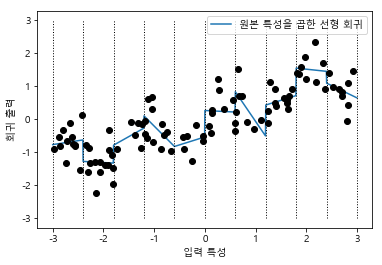

In [21]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 선형 회귀')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

#### 고차항을 추가한 모델

In [32]:
from sklearn.preprocessing import PolynomialFeatures

# x ** 10까지 고차항을 추가합니다
# 기본값인 "include_bias=True"는 절편에 해당하는 1인 특성을 추가합니다.
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
# X_poly = poly.fit_transform(X)

In [26]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [27]:
print("X 원소:\n{}".format(X[:5]))
print("X_poly 원소:\n{}".format(X_poly[:5]))

X 원소:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [28]:
print("항 이름:\n{}".format(poly.get_feature_names()))

항 이름:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


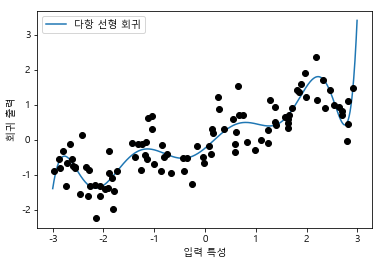

In [29]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

- polynomial을 사용했다면, 절대로 학습하지 않은 구간에 예측을 수행하지 말 것.

#### 고차항회귀 vs kernelized SVR

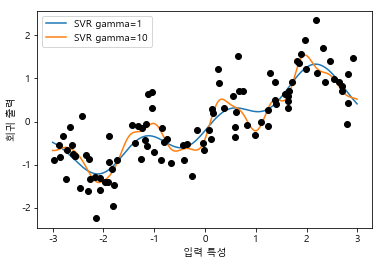

In [33]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

- SVR은 폭등하지않지만, 모든 회귀모델은 예측하지 않은 데이터에 대한 예측을 하지 않는 것이 좋다.
- gamma = 1 / var
    - gamma가 커지면 인접된 데이터만 영향을 미치고 나머지는 0이 됨.
    - 작아지면 정반대

In [34]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                    random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


- 2차 항이 포함된 경우 변수의 수:
    - n(n+1)/2 + (n+1) + (b-1) = 105 + (b-1)
- include_bias = True 이므로 b = 1

In [37]:
print("다항 특성 이름:\n{}".format(poly.get_feature_names()))

다항 특성 이름:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [38]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


In [39]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.774


- RF의 경우에는 상호작용 특성이 없을 경우 더 좋은 모델을 생성한다.
- 왜냐하면 RF는 상호작용 특성을 넣을 필요가 없기 때문이다.
- tree 기반의 모델은 FE을 할 필요가 없다.

___
### 단변량 비선형 변환, 일변량 비선형 변환

In [42]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3)) # Gaussian 분포 생성.
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org)) # poisson 분포 생성. 
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


- poisson 분포. 포아송 분포가 의미하는 것은 단위 시간(공간) 당 어떤 사건이 발생하는 건 수의 평균이 gamma일 때, 사건의 발생횟수를 리턴하는 함수.
- ex) 어떤 은행의 단위 시간 당 손님이 평균 2명일 때, gamma = 2
- 사건이 발생할 횟수가 늘어날 수록 확률이 줄어든다.

In [33]:
print("특성 출현 횟수:\n{}".format(np.bincount(X[:, 0].astype('int'))))

특성 출현 횟수:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, '값')

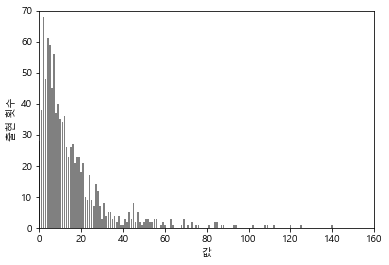

In [43]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

- 큰 값이 발생할 확률은 굉장히 작다.
- right long tail == right skewed

In [45]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.622


In [48]:
# 마이너스 무한대 값을 피하기 위해 + 1
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, '값')

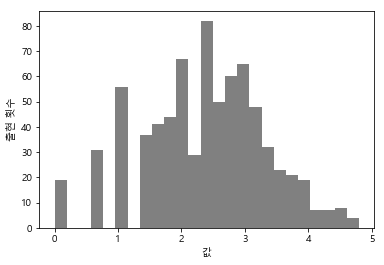

In [49]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("출현 횟수")
plt.xlabel("값")

- log scale을 적용한 결과

In [50]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.875


___
## 특성 자동 선택
- 회사가 돈이 없으면 그만큼 변수를 줄이자 ^ ^
#### 모델기반 선택
- base model로 RF를 사용하고, 중요도 변수를 추출하여 더 나은 모델을 만든다.

#### 단변량 통계
- sklearn.feature_selection
    - p-value : 0가설. 작을수록 좋은 변수
    - f.regression(타겟이 연속형)
        - 범주형 변수에 대해서는 분산 분석 타겟 평균과의 차이를 테스트
        - 연속형 변수에 대해서는 상관 분석 타겟과의 상관성 테스트
    - f_classfi(타겟이 범주형)
        - 범주형 변수에 대해서는 카이제곱 검정을 통해 타겟과의 독립성 테스트
        - 연속형 변수에 대해서는 t 검정을 통해 타겟 클래스 간의 평균 차를 테스트
    - 이러한 통계적 검정은 모두 검정값 p-value 로 해석. pvalues_ 속성으로 기록. 
        - 일반적으로 이 값이 크면 유의하지 않은 변수로 처리.
    - 위 클래스의 가장 간단한 구현체들은 F값으로 판정.
        - SelectKBest : 가장 유의한 k 개의 변수를 선택해준다.
        - SelectPercentile : 
        - F-value : 기각할 수 있을 확률. F값이 커질수록 유의미한 변수
    
    - 자유도 : 범주의 종류 수 - 1
         - ex) 전부 남자인 정보는 아무런 자유도가 없다.

#### 통계기반 Feature 추출

In [76]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 고정된 난수를 발생시킵니다
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 데이터에 노이즈 특성을 추가합니다
# 처음 30개는 원본 특성이고 다음 50개는 노이즈입니다
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택합니다
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)
# 훈련 세트에 적용합니다
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


#### get_support()를 통해 선택된 특성들을 확인해보자

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x21b78c0fcf8>],
 <a list of 1 Text yticklabel objects>)

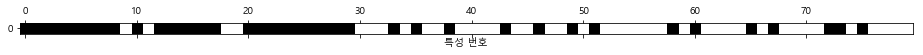

In [78]:
mask = select.get_support()
print(mask)
# True는 검은색, False는 흰색으로 마스킹합니다
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

- 기존 변수 5개를 놓친 모습.

In [79]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(
        lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.930
선택된 일부 특성을 사용한 점수: 0.940


- 선택된 일부 특성만을 사용한다면 예측하는 시간이 줄어드므로, 온라인에 이용하기 적합

#### 모델 기반 특성 선택

In [81]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median") # 50% 추출, ex) 0.8 * median == 상위 40%

In [82]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([<matplotlib.axis.YTick at 0x21b76ecebe0>],
 <a list of 1 Text yticklabel objects>)

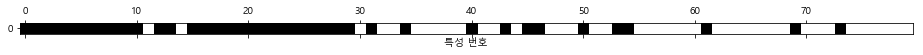

In [85]:
mask = select.get_support()
# True는 검은색, False는 흰색으로 마스킹합니다
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

In [86]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(solver='liblinear').fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


#### 반복적 특성 선택
- 재귀적 특성 제거 방법 Recursive Feature Elimination(RFE)를 사용.
- 시간이 많이 걸리지만, 가장 정확하게 변수를 추출해냄.

([<matplotlib.axis.YTick at 0x21b76f0c860>],
 <a list of 1 Text yticklabel objects>)

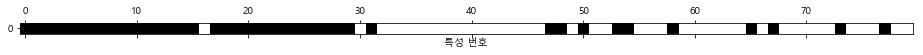

In [88]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
# 선택된 특성을 표시합니다
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

In [89]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(solver='liblinear').fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.951


In [90]:
print("테스트 점수: {:.3f}".format(select.score(X_test, y_test)))

테스트 점수: 0.951


___
### 전문가 지식 활용
- 분석가의 도메인 지식은 전부 높을 수가 없으므로, 데이터를 이용해서 전문가의 자문을 구해서 FE 해보자.
- 요일정보, 월 정보, 공휴일 정보
- 어린이들의 방학 여부

In [91]:
citibike = mglearn.datasets.load_citibike()

- 위 데이터는 8월 한 달 동안의 대여 수를 나타낸다.

In [92]:
print("시티 바이크 데이터:\n{}".format(citibike.head()))

시티 바이크 데이터:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, '대여횟수')

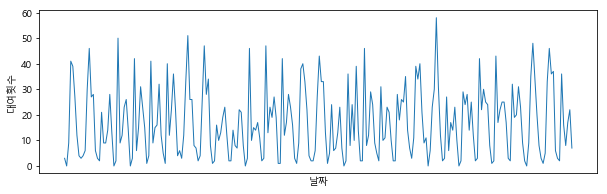

In [107]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
week = ["일", "월", "화","수", "목", "금", "토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"), 
                                              xticks.strftime(" %m-%d"))]
plt.xticks(xticks.astype(int), xticks_name, rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")

In [115]:
# 타깃값 추출 (대여 횟수)
y = citibike.values
# POSIX 시간을 10**9로 나누어 변경
# 최초 설정 시간 기준으로부터 해당 날짜까지 흐른 초 시간 // 10**9 (데이터 크기를 넘지 않도록 나눠줌)
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9 
X.size

248

- forecasting, 첫 데이터를 훈련데이터로 이후 데이터는 테스트 데이터로 사용.
- 따라서, 시계열 데이터를 섞지않음.

In [116]:
# 처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지(X-n_train)는 테스트 세트로 사용합니다
n_train = 184

# 주어진 특성을 사용하여 평가하고 그래프를 만듭니다
def eval_on_features(features, target, regressor):
    # 과거 데이터 / 미래 예측 데이터 나누기
    # 훈련 세트와 테스트 세트로 나눕니다
    X_train, X_test = features[:n_train], features[n_train:]
    # 타깃값도 나눕니다
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left") # 하루 간격으로 tick pointing

    plt.plot(range(n_train), y_train, label="훈련")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="테스트") # n_train 이후 test 결과
    plt.plot(range(n_train), y_pred_train, '--', label="훈련 예측")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="테스트 예측")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")

#### Tree

테스트 세트 R^2: -0.04


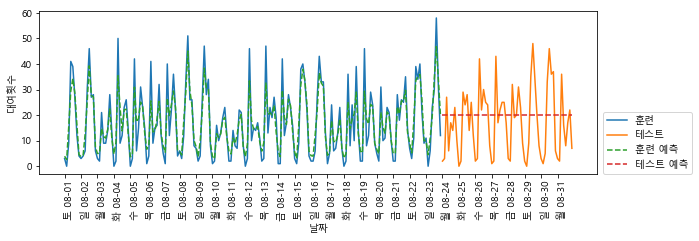

In [117]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

- tree 기반 모델이므로 학습하지 못한 이후 데이터는 예측이 불가능.

테스트 세트 R^2: 0.60


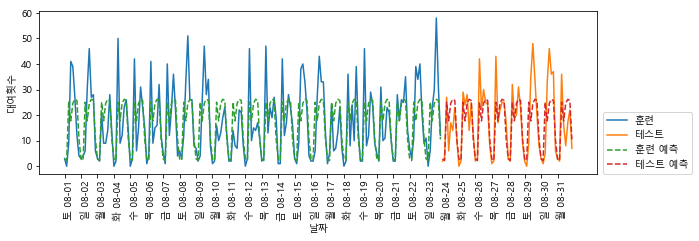

In [127]:
# 시간 정보만을 뽑아서 예측을 수행해보자
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

테스트 세트 R^2: 0.84


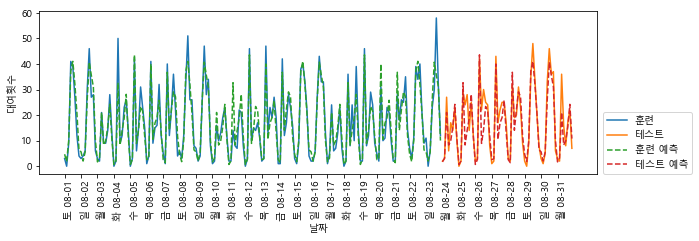

In [128]:
# 시간 정보 + 요일을 뽑아서 예측을 수행해보자
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

- 결과는 잘 나왔지만 모델 해석력이 부족하므로 선형 회귀를 사용해보자.

#### LinearReg

테스트 세트 R^2: 0.13


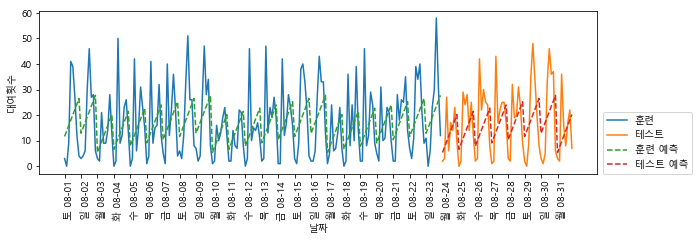

In [120]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

- 요일과 시간 정보는 연속형이 아니라 범주형이라고 생각할 수 있으므로 one-hot encoding해보자.

In [132]:
enc = OneHotEncoder(categories='auto')
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
X_hour_week_onehot.shape

(248, 15)

- 8개의 시간과 7개의 요일로 변환

테스트 세트 R^2: 0.62


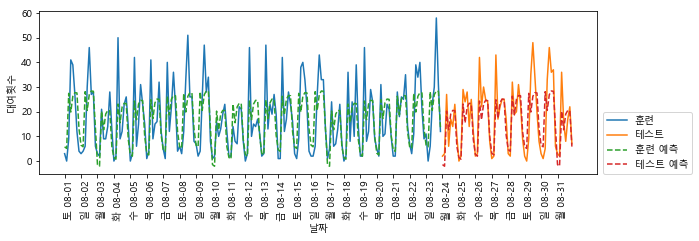

In [133]:
eval_on_features(X_hour_week_onehot, y, Ridge())

- 이 회귀식은 요일별로 하나의 평균값과 시간별로 하나의 평균값만을 예측할 뿐이다.
- 이는 모든 시간패턴이 모든 요일에서 동일하다는 의미이다,
- 따라서 교호작용을 적용시키기 위해 polynomial 사용해서 변수를 추가하자.

테스트 세트 R^2: 0.85


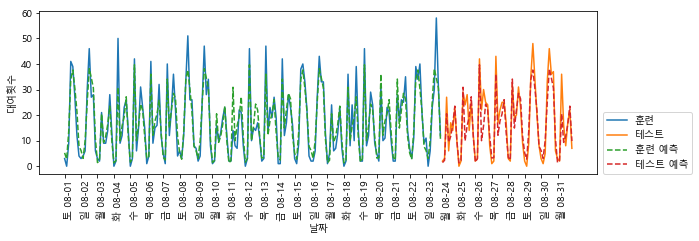

In [135]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

- RF와 유사한 정확도가 나왔다. 그러면 모델해석을 해보자.

In [136]:
X_hour_week_onehot_poly.shape

(248, 120)

- 120개의 변수 생성됨.
- 15 * 15 = 225개 중 105개의 변수가 사라졌음.
- interaction_only=True, 자기 자신에 대한 고차항은 제거. 즉, 15개 제거
- 15 + 15C2 = 120개 
- 하지만 위 변수들 중에는 시간 * 요일뿐만아니라, 시간 * 시간인 교차항도 존재하므로 올바르지 않다.

In [124]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["월", "화", "수", "목", "금", "토", "일"]
features =  day + hour

In [125]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0] # 회귀계수에 대해서 0이 아닌 것들 골라내기.
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, '계수 크기')

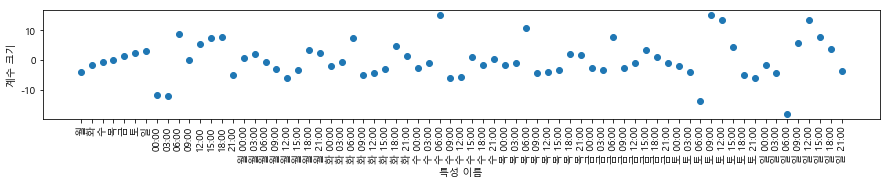

In [126]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")

### 요약 및 정리